In [14]:
%matplotlib notebook
import matplotlib.pyplot as plt
#import seaborn as sns
import pandas as pd
import numpy as np
plt.rcParams['figure.dpi'] = 100

# Using the adult dataset

In [15]:
adult = pd.read_csv("data/adult.csv", index_col=0)

In [16]:
adult.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [17]:
adult.income.value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

<IPython.core.display.Javascript object>


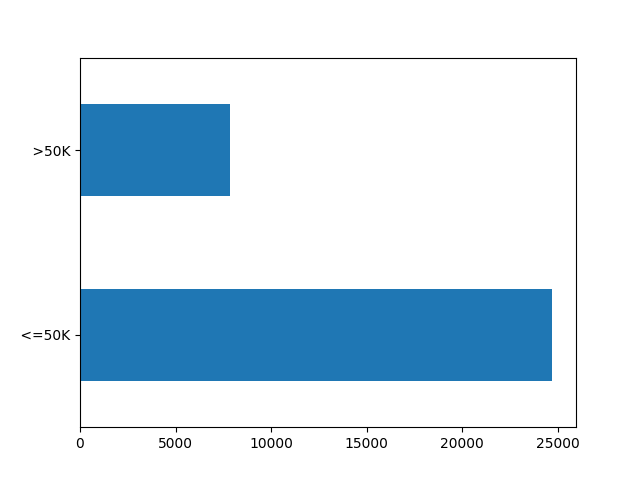

In [18]:
adult.income.value_counts().plot(kind="barh")

In [19]:
adult.education.value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [20]:
adult.groupby("income")

In [21]:
adult.groupby("income")['education'].value_counts()

income  education    
 <=50K   HS-grad         8826
         Some-college    5904
         Bachelors       3134
         11th            1115
         Assoc-voc       1021
         10th             871
         Assoc-acdm       802
         Masters          764
         7th-8th          606
         9th              487
         12th             400
         5th-6th          317
         1st-4th          162
         Prof-school      153
         Doctorate        107
         Preschool         51
 >50K    Bachelors       2221
         HS-grad         1675
         Some-college    1387
         Masters          959
         Prof-school      423
         Assoc-voc        361
         Doctorate        306
         Assoc-acdm       265
         10th              62
         11th              60
         7th-8th           40
         12th              33
         9th               27
         5th-6th           16
         1st-4th            6
Name: education, dtype: int64

In [22]:
education_counts = adult.groupby("income")['education'].value_counts()

In [23]:
education_counts.unstack("income")

income,<=50K,>50K
education,,
10th,871.0,62.0
11th,1115.0,60.0
12th,400.0,33.0
1st-4th,162.0,6.0
5th-6th,317.0,16.0
7th-8th,606.0,40.0
9th,487.0,27.0
Assoc-acdm,802.0,265.0
Assoc-voc,1021.0,361.0


<IPython.core.display.Javascript object>


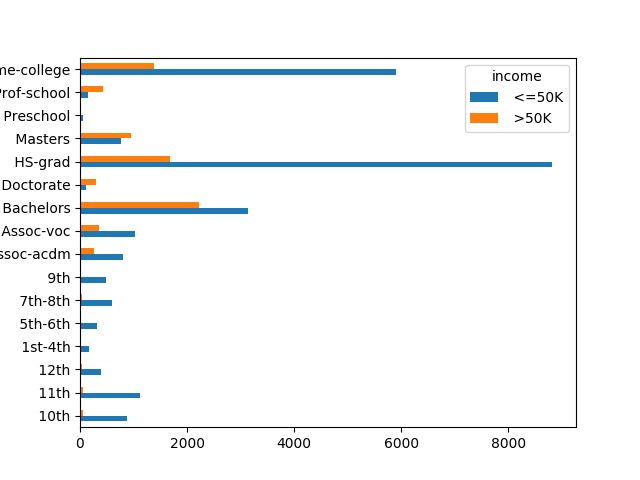

In [24]:
unstacked_education = education_counts.unstack("income")
unstacked_education.plot(kind="barh")

<IPython.core.display.Javascript object>


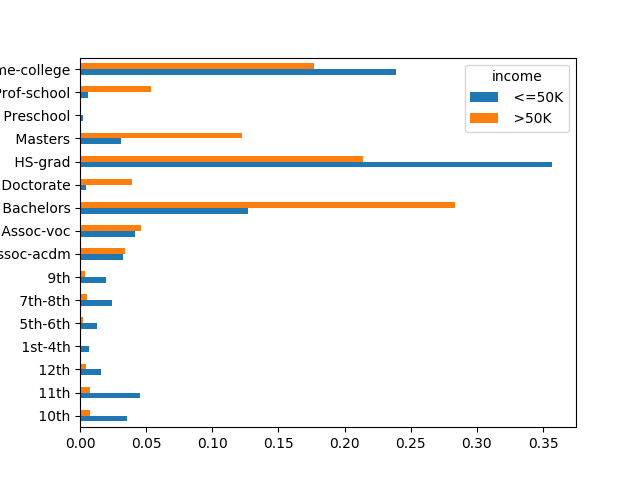

In [25]:
(unstacked_education / unstacked_education.sum(axis=0)).plot(kind="barh")

In [26]:
unstacked_education.columns

Index([' <=50K', ' >50K'], dtype='object', name='income')

<IPython.core.display.Javascript object>


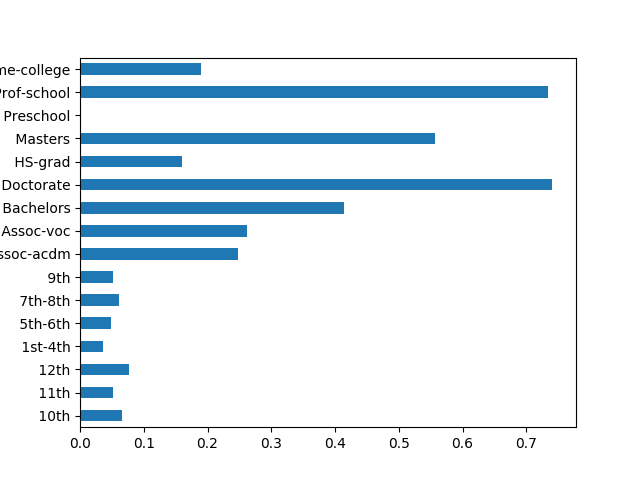

In [27]:
plt.figure()
(unstacked_education[" >50K"] / unstacked_education.sum(axis=1)).plot(kind="barh")

# Exercise
Group the data by gender, and compare the income distributions over genders.
Do a similar plot for some of the other variables.

In [ ]:
# solution

# Exercise
Apply the basic machine learning workflow to the dataset.
For simplicity you might want to drop the "native-country" column.
Proceed as follows:
- separate features and target
- do dummy encoding of the categorical features
- split data in training and test set
- scale the data
- apply a machine learning model. Start with ``sklearn.linear_model.LogisticRegression``, a linear classifier.
- visualize the coefficients in a bar-plot (if there are too many, only show the ones of larges magnitude)